# Cartopy: Create a Map Inset

This was pieced together from these resources

- https://predictablysunny.com/posts/inset_map_cartopy/
- https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/effects_of_the_ellipse.html#sphx-glr-gallery-lines-and-polygons-effects-of-the-ellipse-py
- https://stackoverflow.com/a/53712048/2383070

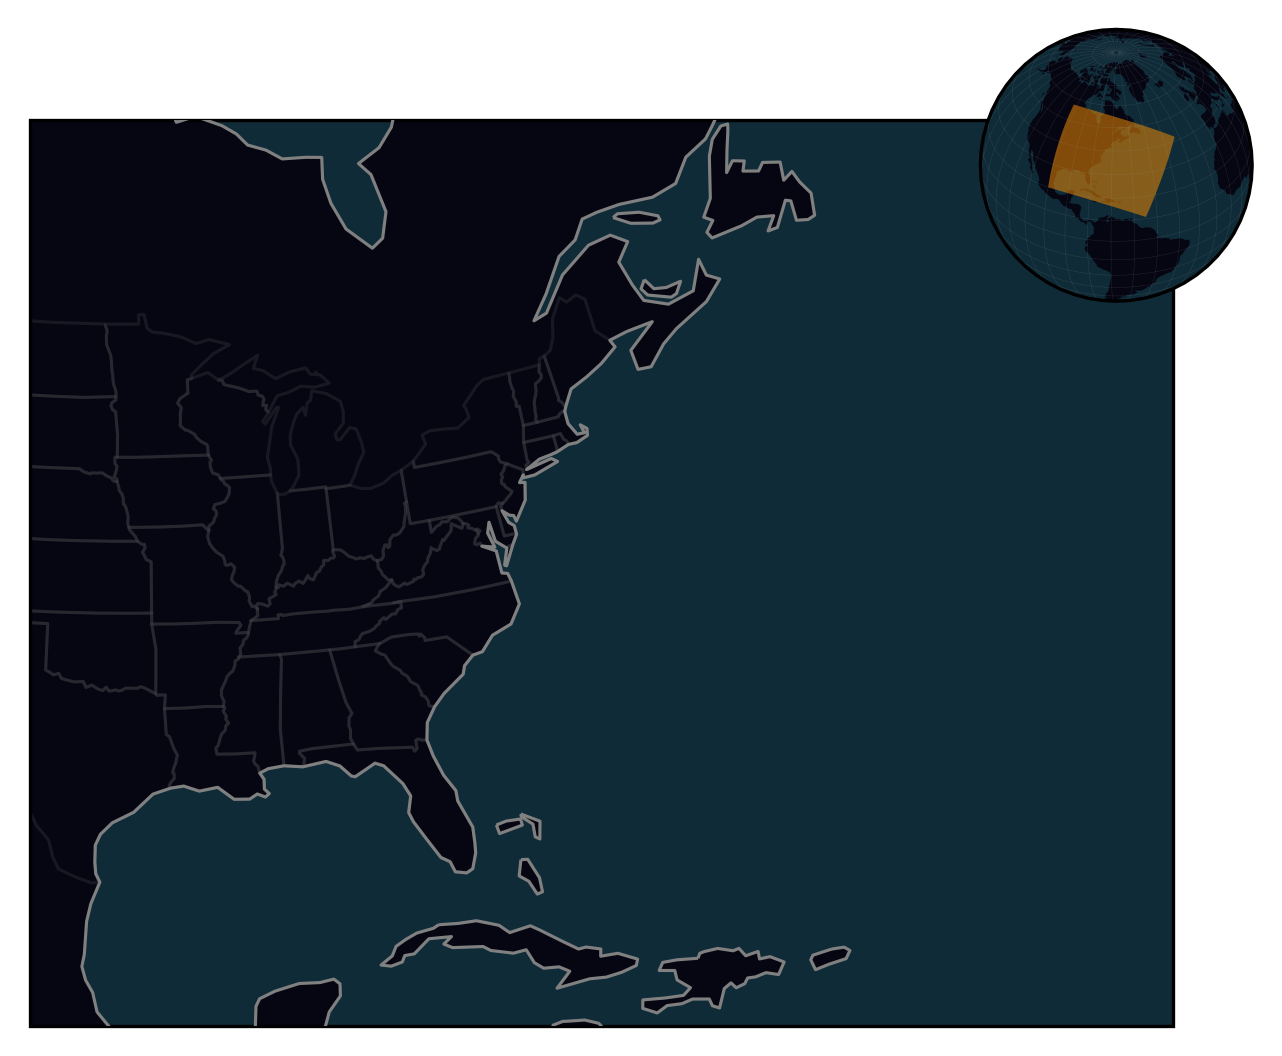

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import shapely.geometry as sgeom
from shapely.geometry import LinearRing, LineString
from toolbox import EasyMap, pc, ccrs

# =======================
# Create the Cartopy axes

ax = EasyMap(dark=True, dpi=300, crs=ccrs.LambertConformal()).OCEAN().LAND().STATES().ax
ax.set_extent([-100, -50, 20, 50], crs=pc)

# ======================
# Find the extent center
extent = ax.get_extent(crs=pc)
center_lon = (extent[0] + extent[1]) / 2
center_lat = (extent[2] + extent[3]) / 2

# ====================
# Create the Inset Map

# Location and size of inset on axis
inset_x = 0.95
inset_y = 0.95
inset_size = 0.3

# Create and position inset
ortho = ccrs.Orthographic(central_latitude=center_lat, central_longitude=center_lon)
ax_inset = plt.axes([0, 0, 1, 1], projection=ortho)
ax_inset.set_global()

ip = InsetPosition(
    ax, [inset_x - inset_size / 2, inset_y - inset_size / 2, inset_size, inset_size]
)
ax_inset.set_axes_locator(ip)

# ===================
# Inset Map Cosmetics
EasyMap(ax=ax_inset, dark=True, linewidth=0).STATES().LAND().OCEAN()

ax_inset.gridlines(
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 91, 10),
    lw=0.1,
    alpha=0.2,
)

# =========================
# Add Bounding Box to Inset

# Create Boundary box: need to increase the boundary of box Polygon coords
crs_extent = ax.get_extent(crs=ax.projection)
ring = sgeom.box(crs_extent[0], crs_extent[2], crs_extent[1], crs_extent[3]).exterior

# Set the number of points along a side
n_points = 200

# Create a new LinearRing with additional points
new_ring_coords = []
for i in range(len(ring.coords) - 1):
    start = ring.coords[i]
    end = ring.coords[i + 1]
    line = LineString([start, end])
    new_points = [line.interpolate(i) for i in np.linspace(1, line.length, n_points)]
    new_ring_coords += [start] + new_points + [end]
new_ring = LinearRing(new_ring_coords)

# Add bounding box to map
ax_inset.add_geometries(
    [new_ring],
    crs=ax.projection,
    facecolor="#f88d0083",
)